In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [1]:
#helper func for standardization and getting gradients in lasso Regression
def standard_scalar(X):
    mean = X.mean(0)
    stds = X.std(0)
    return (X-mean)/stds

def sign(x,first_ele_zero=False):
    signs = (-1)**(x<0)
    if first_ele_zero:
        signs[0] = 0
    return signs    

In [19]:
class RegularizedRegression:
        
    def _record_info(self, X, y, lam, intercept, standardize):
        
        # standardize 
        if standardize == True: 
            X = standard_scalar(X)
        
        # add intercept
        if intercept == False: 
            ones = np.ones(len(X)).reshape(len(X), 1) # column of ones 
            X = np.concatenate((ones, X), axis = 1) # concatenate
            
        # record values
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        self.lam = lam
        
    def fit_ridge(self, X, y, lam = 0, intercept = False, standardize = True):
        
        # record data and dimensions
        self._record_info(X, y, lam, intercept, standardize)
        
        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        I_prime = np.eye(self.D)
        I_prime[0,0] = 0 
        XtX_plus_lam_inverse = np.linalg.inv(XtX + self.lam*I_prime)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_plus_lam_inverse, Xty)
        
        # get fitted values
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        
    def fit_lasso(self, X, y, lam = 0, n_iters = 2000,
                  lr = 0.0001, intercept = False, standardize = True):

        # record data and dimensions
        self._record_info(X, y, lam, intercept, standardize)
        
        # estimate parameters
        beta_hats = np.random.randn(self.D)
        for i in range(n_iters):
            dL_dbeta = -self.X.T @ (self.y - (self.X @ beta_hats)) + self.lam*sign(beta_hats, True)
            beta_hats -= lr*dL_dbeta 
        self.beta_hats = beta_hats
        
        # get fitted values
        self.y_hat = np.dot(self.X, self.beta_hats)

In [20]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
X  = diab['data']
y = diab['target']

In [21]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [22]:
ridge_model = RegularizedRegression()
ridge_model.fit_ridge(X,y,lam=10)

In [23]:
lasso_model = RegularizedRegression()
lasso_model.fit_lasso(X,y,lam=10)

In [26]:
sns.set()

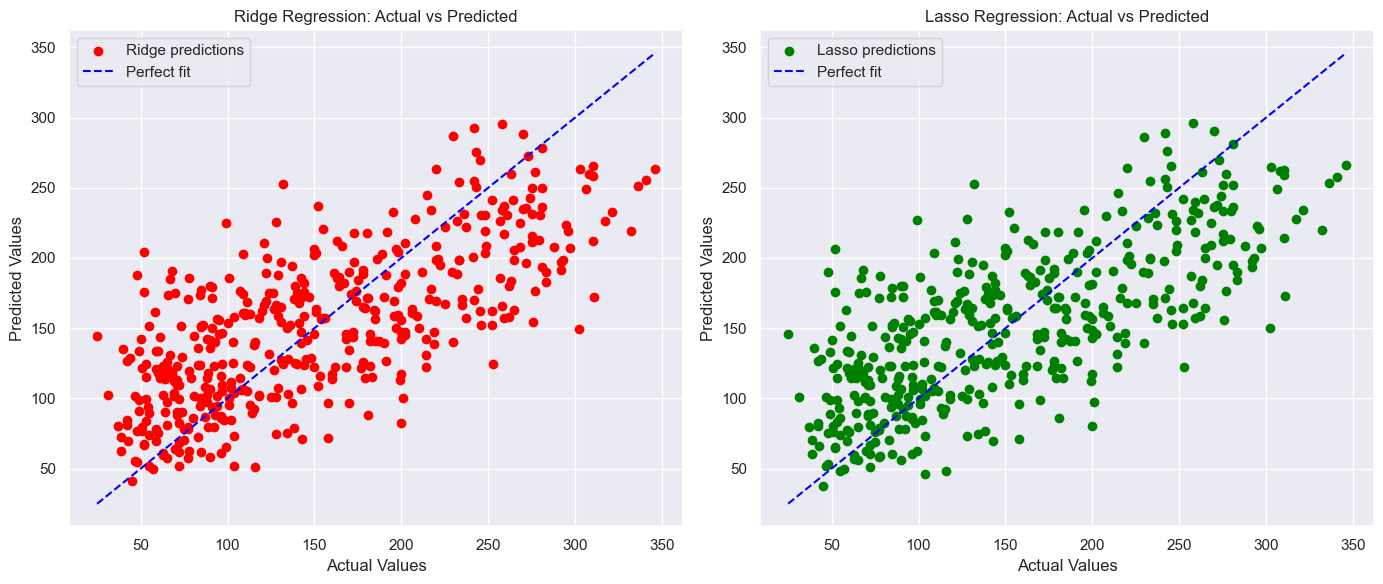

In [29]:

# Get predictions
ridge_predictions = ridge_model.y_hat
lasso_predictions = lasso_model.y_hat

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 6))

# Ridge Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y, ridge_predictions, color='red', label='Ridge predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='blue', label='Perfect fit')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Lasso Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y, lasso_predictions, color='green', label='Lasso predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='blue', label='Perfect fit')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()
